# Initializing

In [25]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns
import pprint
import plotly
from plotly import express as px
%matplotlib inline 
import re

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#Options for display/ formatting 

pd.set_option('display.max_rows', 100)
pd.options.display.float_format='{:.2f}'.format

# Importing files

In [4]:
associations= pd.read_csv("sql/associations_info.csv", sep=';')
associations.head(2)

,asso_id,association_name,adresse,effectif,creation,objet_de_lassociation,inscription_rna,date_inscr
0,6,make4,14 RUE ST GUILLAUME 75007 PARIS 7,Entre 3 et 5 salariés (donnée 2020),2017-01-11,NaN,0,NaN
1,8,voteetvous,133 RUE ST DOMINIQUE 75007 PARIS 7,Au moins 1 salarié (donnée 2023),2014-01-27,"Renforcer l'exercice démocratique du vote, en ...",1,2014-01-27


In [6]:
companies= pd.read_csv("sql/companies_info.csv", sep=';')
companies.head(2)

,company_id,companyname,adresse,activite,effectif,creation,forme_juridique,capital_social,activite_principale_declaree,code_naf_ou_ape,domaine_dactivite,inscription_rcs,greffe,date_inscr_rad,directors
0,0,citility,5 RUE DE LA CLAIRE 69009 LYON 9EME,Édition de logiciels applicatifs,0 salarié (donnée 2019),2014-05-05,"SAS, société par actions simplifiée",39620,Edition de logiciels applicatifs.,58.29C (Édition de logiciels applicatifs),Édition,1,LYON,2014-05-12,"André MAY, ODICEO, Sabine SCHNECK"
1,1,poligma,RPT BENJAMIN FRANKLIN 34960 MONTPELLIER CEDEX 2,Conseil en systèmes et logiciels informatiques,Entre 3 et 5 salariés (donnée 2020),2015-09-01,"SAS, société par actions simplifiée",20944,Développement de services informatiques et num...,62.02A (Conseil en systèmes et logiciels infor...,"Programmation, conseil et autres activités inf...",1,MONTPELLIER,2015-09-11,Philippe GERARD


In [104]:
finance= pd.read_csv("sql/companies_finance.csv", sep=';')
finance.head(2)

,company_year_ide,company,annee,chiffre_daffaires_e,marge_brute_e,resultat_dexploitation_e,resultat_net_e,taux_croissance_ca_pc,taux_marge_brute_pc,taux_marge_operationnelle_pc,...,fonds_propres_e,marge_nette_pc,rentabilite_sur_fonds_propres_pc,rentabilite_economique_pc,valeur_ajoutee_e,valeur_ajoutee_sur_ca_pc,salaires_et_charges_sociales_e,salaires_sur_ca_pc,impots_et_taxes_e,chiffre_daffaires_a_lexport_e
0,0,citility,2017.00,0.00,0,0,-562000,0,0,0,...,1380000,0,0,0,0,0,0,0,0,0
1,1,citility,2016.00,30700.00,527000,-296000,-238000,4,1720,-965,...,382000,-775,-623,-173,351000,1140,636000,2070,9160,0


In [8]:
people= pd.read_csv("sql/people.csv", sep=';')
people.head(2)

,ind_id,geoCountryName,geoLocationName,summary,industryName,headline,experience,education,languages,publications,...,languages_over2,honors_stated,publications_stated,volunteer_stated,projects_stated,certifications_stated,languages_stated,consulting_roles,direction_roles,founding_roles
0,0,France,Paris Metropolitan Region,Antoine croit à l’intelligence de tous et à la...,IT Services and IT Consulting,"Directeur associé de bluenove, initiateur du m...","[{'locationName': 'Paris Area, France', 'entit...",[{'entityUrn': 'urn:li:fs_education:(ACoAAAA61...,"[{'name': 'English', 'proficiency': 'FULL_PROF...","[{'date': {'month': 9, 'year': 2017, 'day': 1}...",...,1,0,1,0,0,0,1,0,3,0
1,1,France,Paris Metropolitan Region,French Entrepreneur - Founder and Managing Par...,Venture Capital and Private Equity Principals,Founder & Managing Partner at ROCH Ventures,[{'entityUrn': 'urn:li:fs_position:(ACoAAAfK9Y...,[{'entityUrn': 'urn:li:fs_education:(ACoAAAfK9...,[],[],...,0,1,0,0,0,0,0,0,2,2


In [9]:
experience= pd.read_csv("sql/experience.csv", sep=';')
experience.head(2)

,exp_id,ind_id,locationName,companyName,description,title,startDate_month,startDate_year,endDate_month,endDate_year,industry,company_empl_low,company_empl_high,title_direction,titleconsulting,titlefounder
0,0,0,Paris Metropolitan Region,bluenove,Bluenove accompagne la transformation positive...,Directeur associé,11,2017,0,0,Management Consulting,11,50,1,0,0
1,1,0,Paris Metropolitan Region,démocratie ouverte,Démocratie Ouverte est un collectif citoyen in...,Co-Président,1,2018,5,2020,Management Consulting,11,50,1,0,0


In [10]:
education= pd.read_csv("sql/education_2.csv", sep=';')
education.head(2)

,ind_id,school,degreeName,schoolName,fieldOfStudy,startDate_year
0,0,"{'objectUrn': 'urn:li:school:19908', 'entityUr...",Master,ESCP Europe,Business/Managerial Economics,1998
1,0,NaN,NaN,Prépa Saint Jean de Douai,NaN,1996


# Concat, merge, join, new_df

# Data description and cleaning

## Associations

In [26]:
associations.shape

(15, 8)

In [13]:
print(list(associations.columns))

['asso_id', 'association_name', 'adresse', 'effectif', 'creation', 'objet_de_lassociation', 'inscription_rna', 'date_inscr']


In [21]:
associations.info()
# describe, isna and types are included here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   asso_id                15 non-null     int64         
 1   association_name       15 non-null     object        
 2   adresse                15 non-null     object        
 3   effectif               15 non-null     object        
 4   creation               15 non-null     datetime64[ns]
 5   objet_de_lassociation  14 non-null     object        
 6   inscription_rna        15 non-null     int64         
 7   date_inscr             14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.1+ KB


In [19]:
associations['creation']=pd.to_datetime(associations['creation'], dayfirst=True)
associations['date_inscr']=pd.to_datetime(associations['date_inscr'], dayfirst=True)

In [40]:
associations.describe(include='O')

,association_name,adresse,effectif,objet_de_lassociation,post_code
count,15,15,15,14,15
unique,15,15,5,14,10
top,make4,14 RUE ST GUILLAUME 75007 PARIS 7,0 salarié (donnée 2023),"Renforcer l'exercice démocratique du vote, en ...",75011
freq,1,1,6,1,4


In [44]:
associations[["association_name", "creation", "post_code", "effectif"]].sort_values(by="creation")

,association_name,creation,post_code,effectif
7,assemblee_virtuelle,2011-05-31,75019,Au moins 1 salarié (donnée 2023)
13,regardscitoyens,2013-07-15,31200,0 salarié (donnée 2023)
1,voteetvous,2014-01-27,75007,Au moins 1 salarié (donnée 2023)
5,hacktiv,2014-07-28,75011,Entre 3 et 5 salariés (donnée 2020)
11,democratieouverte,2014-08-01,75011,0 salarié (donnée 2023)
3,democracyos,2015-04-21,75018,Au moins 1 salarié (donnée 2023)
14,veritepol,2015-06-30,64200,0 salarié (donnée 2023)
8,wesignit,2015-11-09,75020,Entre 1 et 2 salariés (donnée 2020)
6,voxpublic,2016-02-11,75011,Entre 3 et 5 salariés (donnée 2020)
2,lesbricodeurs,2016-04-30,69001,Entre 1 et 2 salariés (donnée 2020)


In [49]:
associations["effectif"].value_counts()

0 salarié  (donnée 2023)                6
Entre 3 et 5 salariés  (donnée 2020)    3
Au moins 1 salarié  (donnée 2023)       3
Entre 1 et 2 salariés  (donnée 2020)    2
0 salarié  (donnée 2020)                1
Name: effectif, dtype: int64

In [55]:
associations[['salaries', 'date_donnee_salaries']]= associations["effectif"].str.split("donnée", 1, expand=True)
associations['salaries']=associations["salaries"].str.replace('(', '')
associations['date_donnee_salaries']=associations["date_donnee_salaries"].str.replace(')', '')
associations.drop(columns='effectif', inplace=True)

/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_5480/2429502321.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  associations[['salaries', 'date_donnee_salaries']]= associations["effectif"].str.split("donnée", 1, expand=True)
/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_5480/2429502321.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  associations['salaries']=associations["salaries"].str.replace('(', '')
/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_5480/2429502321.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  associations['date_donnee_sal

In [56]:
associations.head()

,asso_id,association_name,adresse,creation,objet_de_lassociation,inscription_rna,date_inscr,post_code,salaries,date_donnee_salaries
0,6,make4,14 RUE ST GUILLAUME 75007 PARIS 7,2017-01-11,NaN,0,NaT,75007,Entre 3 et 5 salariés,2020
1,8,voteetvous,133 RUE ST DOMINIQUE 75007 PARIS 7,2014-01-27,"Renforcer l'exercice démocratique du vote, en ...",1,2014-01-27,75007,Au moins 1 salarié,2023
2,26,lesbricodeurs,8 PL LOUIS CHAZETTE 69001 LYON 1ER,2016-04-30,Diffuser la culture numérique et accompagner d...,1,2015-11-05,69001,Entre 1 et 2 salariés,2020
3,38,democracyos,17 RUE MYRHA 75018 PARIS 18,2015-04-21,Représenter la communauté qui développe et qui...,1,2015-04-21,75018,Au moins 1 salarié,2023
4,39,polipart,70 BD DE CLICHY 75018 PARIS 18,2019-03-09,"Améliorer la relation entre institutions, élus...",1,2019-03-09,75018,0 salarié,2023


In [57]:
associations.salaries.value_counts()

0 salarié                  7
Entre 3 et 5 salariés      3
Au moins 1 salarié         3
Entre 1 et 2 salariés      2
Name: salaries, dtype: int64

In [60]:
associations[["association_name", "creation", "post_code", "salaries", "date_donnee_salaries"]].sort_values(by="creation")

,association_name,creation,post_code,salaries,date_donnee_salaries
7,assemblee_virtuelle,2011-05-31,75019,Au moins 1 salarié,2023
13,regardscitoyens,2013-07-15,31200,0 salarié,2023
1,voteetvous,2014-01-27,75007,Au moins 1 salarié,2023
5,hacktiv,2014-07-28,75011,Entre 3 et 5 salariés,2020
11,democratieouverte,2014-08-01,75011,0 salarié,2023
3,democracyos,2015-04-21,75018,Au moins 1 salarié,2023
14,veritepol,2015-06-30,64200,0 salarié,2023
8,wesignit,2015-11-09,75020,Entre 1 et 2 salariés,2020
6,voxpublic,2016-02-11,75011,Entre 3 et 5 salariés,2020
2,lesbricodeurs,2016-04-30,69001,Entre 1 et 2 salariés,2020


## Companies finance

In [106]:
finance

,company_year_ide,company,annee,chiffre_daffaires_e,marge_brute_e,resultat_dexploitation_e,resultat_net_e,taux_croissance_ca_pc,taux_marge_brute_pc,taux_marge_operationnelle_pc,...,fonds_propres_e,marge_nette_pc,rentabilite_sur_fonds_propres_pc,rentabilite_economique_pc,valeur_ajoutee_e,valeur_ajoutee_sur_ca_pc,salaires_et_charges_sociales_e,salaires_sur_ca_pc,impots_et_taxes_e,chiffre_daffaires_a_lexport_e
0,0,citility,2017.00,0.00,0,0,-562000,0,0,0,...,1380000,0,0,0,0,0,0,0,0,0
1,1,citility,2016.00,30700.00,527000,-296000,-238000,4,1720,-965,...,382000,-775,-623,-173,351000,1140,636000,2070,9160,0
2,2,voxcracy,2019.00,46300.00,46300,-38500,-39000,177,100,-833,...,513000,-842,-76,-63,2170,47,33600,725,137,0
3,3,voxcracy,2018.00,16700.00,157000,-130000,-112000,861,940,-776,...,552000,-668,-202,-169,-21000,-126,101000,602,1120,5000
4,4,voxcracy,2017.00,1740.00,75900,-30300,-23400,0,4360,-1740,...,569000,-1350,-41,-39,-5040,-290,19100,1100,329,0
5,5,voxcracy,2016.00,0.00,0,-4910,-4910,0,0,0,...,111,0,-4420,-177,-942,0,0,0,140,0
6,6,LLL,2020.00,473000.00,473000,-42700,-44900,25,100,-9,...,103000,-95,-437,-37,136000,287,97100,205,14200,0
7,7,LLL,2019.00,462000.00,462000,95200,62400,539,100,206,...,148000,135,423,86,292000,632,126000,274,7350,0
8,8,LLL,2018.00,300000.00,300000,25900,19800,0,100,86,...,85300,66,232,38,175000,584,80200,267,5220,0
9,9,LLL,2017.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
a= pd.DataFrame(finance[["company", "chiffre_daffaires_e"]].groupby(["company"], as_index=True).mean())

In [ ]:
a.drop(['make3', 'mesopinions','whip'], axis=0, inplace=True).reset_index(inplace=True)

In [130]:
a

,company,chiffre_daffaires_e
0,IDcity,9950.00
1,LLL,1440714.29
2,Stig,75567.00
3,bluenove,825000.00
4,capcollectif,1662500.00
5,citility,15350.00
6,digiworks,212666.67
7,forcity,1774375.00
8,kawaa,378000.00
9,ledrenche,9745.00


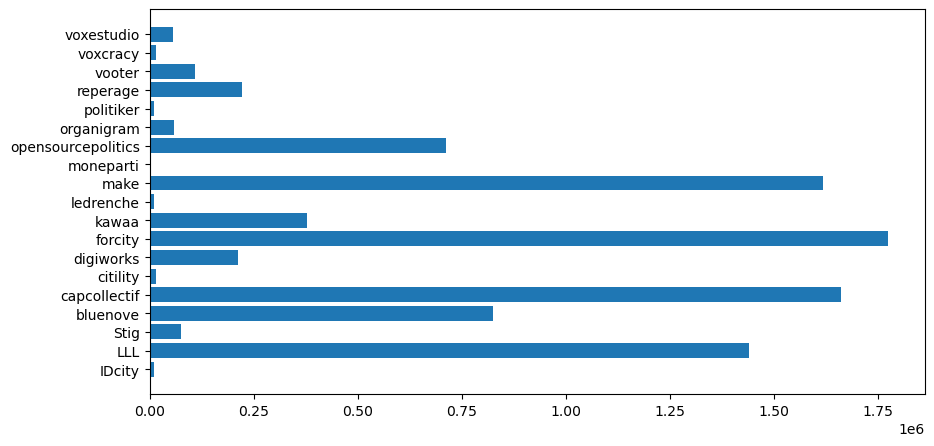

In [161]:
plt.figure(figsize=(10,5))
plt.barh(a['company'],a["chiffre_daffaires_e"])
plt.xlabel="Company"
plt.ylabel="Chiffre d'affaires moyen"

plt.show()

# add title and fix the x scale

In [107]:
data_matrix=finance.corr(numeric_only=True)
data_matrix

,company_year_ide,annee,chiffre_daffaires_e,marge_brute_e,resultat_dexploitation_e,resultat_net_e,taux_croissance_ca_pc,taux_marge_brute_pc,taux_marge_operationnelle_pc,bfr_e,...,fonds_propres_e,marge_nette_pc,rentabilite_sur_fonds_propres_pc,rentabilite_economique_pc,valeur_ajoutee_e,valeur_ajoutee_sur_ca_pc,salaires_et_charges_sociales_e,salaires_sur_ca_pc,impots_et_taxes_e,chiffre_daffaires_a_lexport_e
company_year_ide,1.00,-0.03,0.01,-0.01,0.03,0.06,0.18,-0.19,-0.19,-0.04,...,-0.13,-0.12,0.15,0.03,0.01,-0.16,-0.00,0.03,-0.06,0.21
annee,-0.03,1.00,0.20,0.20,-0.08,-0.06,0.04,0.11,-0.09,0.02,...,0.07,-0.09,-0.01,-0.03,0.17,0.00,0.19,0.26,0.19,0.10
chiffre_daffaires_e,0.01,0.20,1.00,0.93,-0.18,-0.17,-0.05,-0.08,0.13,-0.20,...,0.30,0.11,0.07,-0.00,0.81,0.22,0.72,0.21,0.80,0.37
marge_brute_e,-0.01,0.20,0.93,1.00,-0.40,-0.39,-0.05,-0.03,0.09,-0.18,...,0.30,0.07,0.07,-0.03,0.77,0.20,0.88,0.29,0.86,0.36
resultat_dexploitation_e,0.03,-0.08,-0.18,-0.40,1.00,0.96,0.04,-0.08,0.12,0.08,...,0.25,0.21,0.01,0.13,0.18,0.05,-0.65,-0.19,-0.50,0.05
resultat_net_e,0.06,-0.06,-0.17,-0.39,0.96,1.00,0.03,-0.05,0.06,0.16,...,0.34,0.14,-0.02,0.11,0.19,0.05,-0.60,-0.10,-0.47,0.08
taux_croissance_ca_pc,0.18,0.04,-0.05,-0.05,0.04,0.03,1.00,-0.02,0.04,-0.01,...,-0.04,0.07,0.16,0.12,-0.04,0.04,-0.07,-0.09,-0.06,-0.03
taux_marge_brute_pc,-0.19,0.11,-0.08,-0.03,-0.08,-0.05,-0.02,1.00,-0.17,-0.03,...,0.01,-0.21,-0.02,-0.02,-0.06,0.01,0.02,0.49,-0.00,0.03
taux_marge_operationnelle_pc,-0.19,-0.09,0.13,0.09,0.12,0.06,0.04,-0.17,1.00,0.00,...,0.04,0.80,0.15,0.35,0.16,0.93,0.02,-0.21,0.04,0.09
bfr_e,-0.04,0.02,-0.20,-0.18,0.08,0.16,-0.01,-0.03,0.00,1.00,...,0.41,0.02,-0.04,0.06,0.05,0.05,0.03,0.02,-0.05,0.12


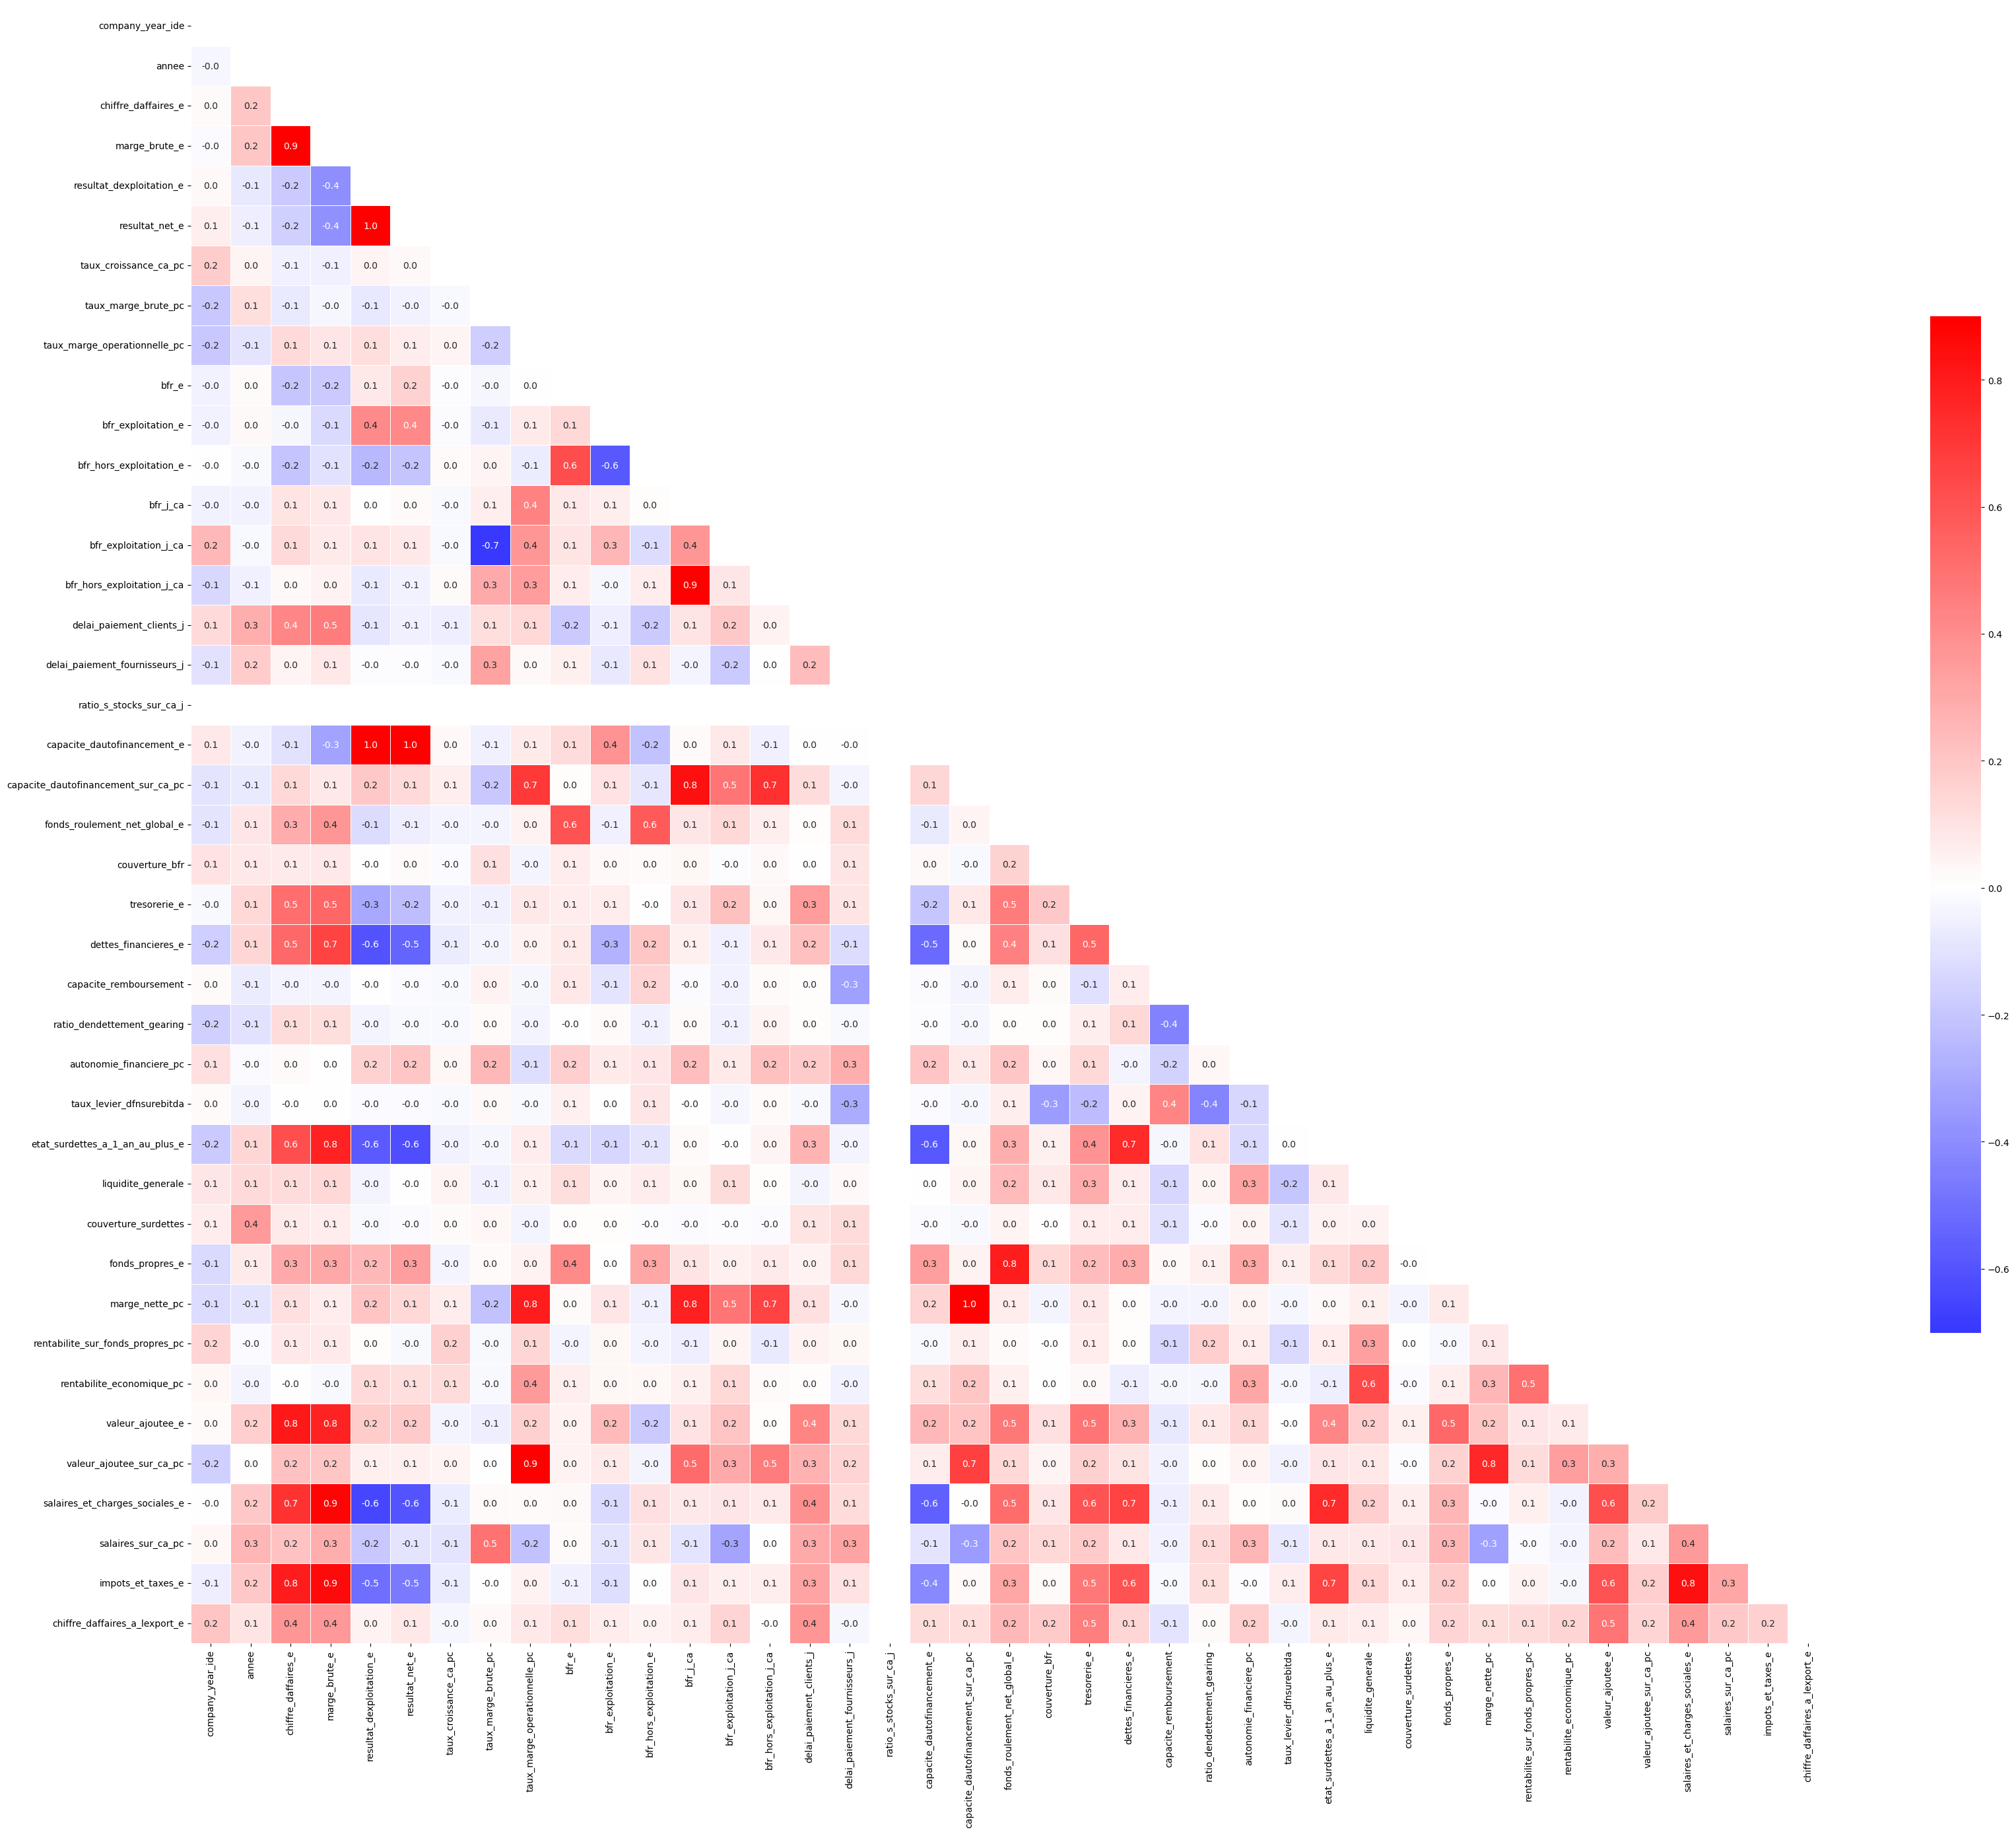

In [108]:
mask=np.zeros_like(data_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True
#cmap=sns.diverging_palette(180, 180, as_cmap=True)

plt.figure(figsize=(40,40))
sns.plot = sns.heatmap(
    data_matrix, 
    mask=mask,
    cmap='bwr',
    vmax=.9,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".1f"
)
# returns triangle of correlations 

In [109]:
upper_tri = data_matrix.where(np.triu(np.ones(data_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)
print(len(to_drop))

['marge_brute_e', 'resultat_net_e', 'bfr_hors_exploitation_j_ca', 'capacite_dautofinancement_e', 'marge_nette_pc', 'valeur_ajoutee_sur_ca_pc']
6


In [110]:
finance.drop(columns=['marge_brute_e', 'bfr_hors_exploitation_j_ca', 'capacite_dautofinancement_e', 'marge_nette_pc', 'valeur_ajoutee_sur_ca_pc', "resultat_dexploitation_e"], inplace=True)
# chose to keep resultat_net instead of resultat_exploitation because the first one has more values included

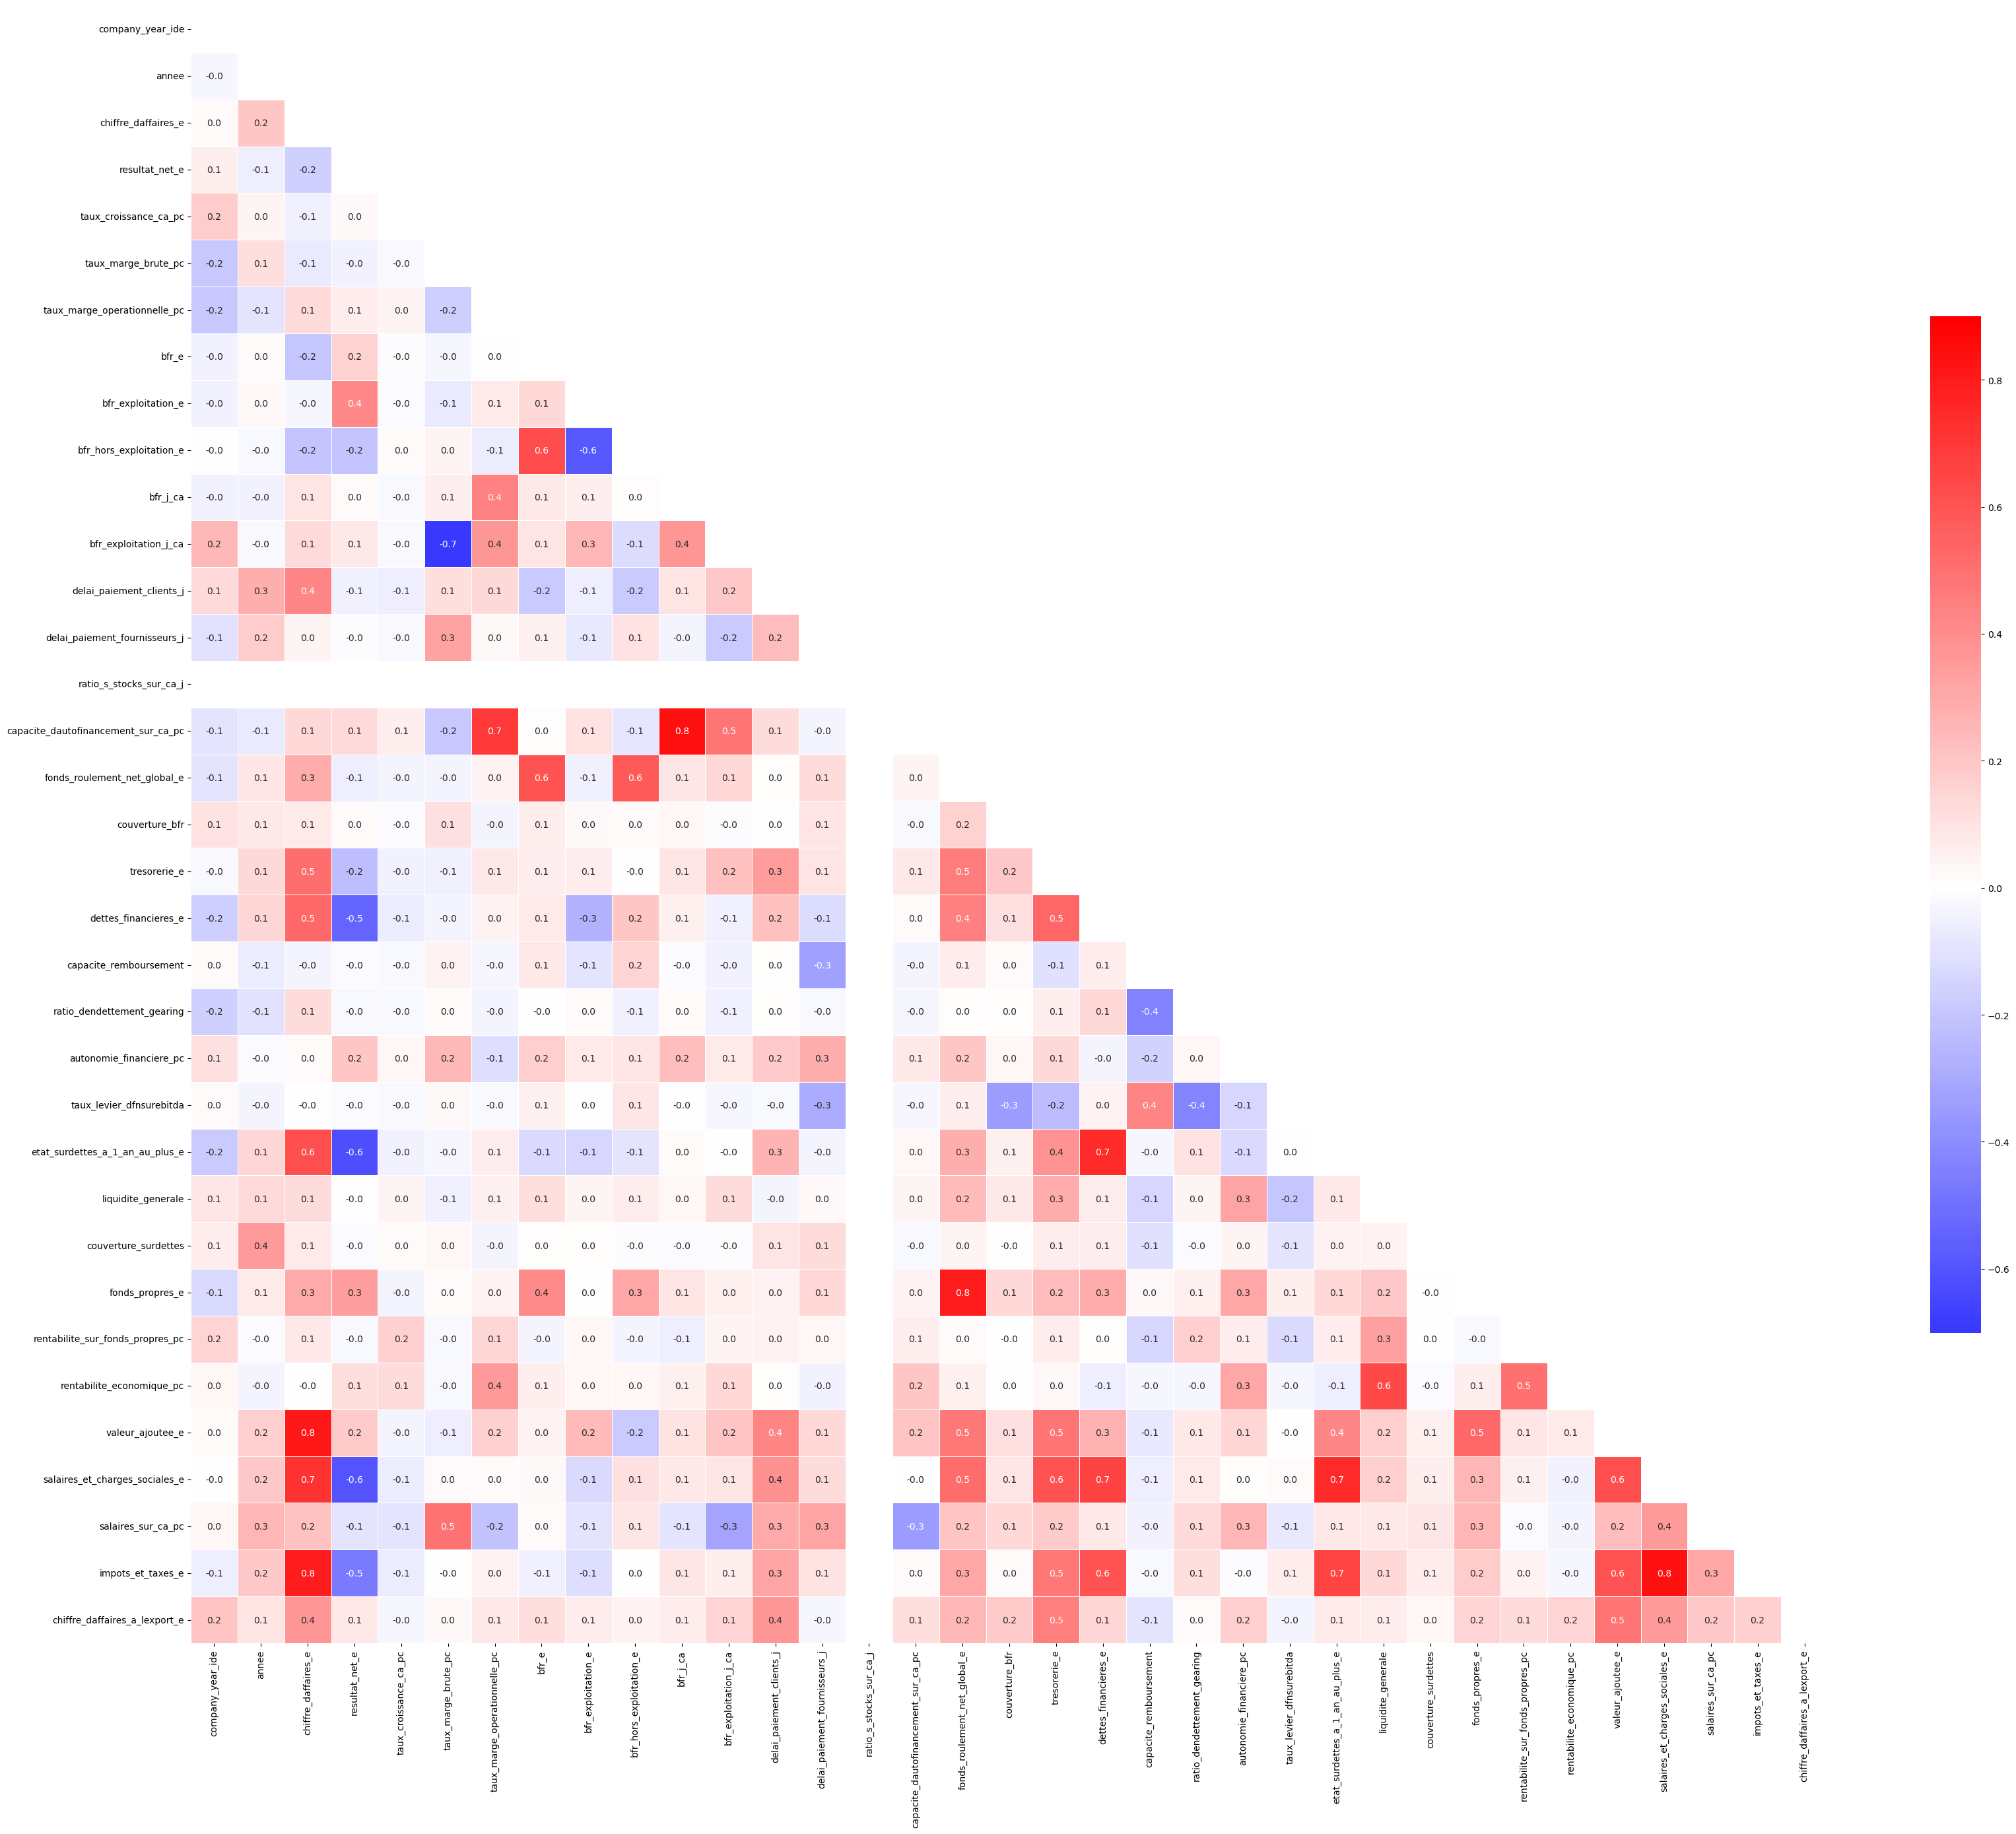

In [111]:
data_matrix2=finance.corr(numeric_only=True)

mask=np.zeros_like(data_matrix2, dtype=bool)
mask[np.triu_indices_from(mask)]= True
#cmap=sns.diverging_palette(180, 180, as_cmap=True)

plt.figure(figsize=(40,40))
sns.plot = sns.heatmap(
    data_matrix2, 
    mask=mask,
    cmap='bwr',
    vmax=.9,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".1f"
)

## Companies

In [114]:
companies.describe(include='O')

,companyname,adresse,activite,effectif,creation,forme_juridique,activite_principale_declaree,code_naf_ou_ape,domaine_dactivite,greffe,date_inscr_rad,directors
count,61,61,61,61,61,61,59,61,61,56,59,58
unique,61,58,22,15,60,8,59,22,13,19,59,57
top,citility,60 RUE DE LONDRES 75008 PARIS 8,Programmation informatique,0 salarié (donnée 2023),2014-09-01,"SAS, société par actions simplifiée",Edition de logiciels applicatifs.,62.01Z (Programmation informatique),"Programmation, conseil et autres activités inf...",PARIS,2014-05-12,"ANNAMAMASHOW, Raymond Maeder, 3APEXCO"
freq,1,2,18,16,2,42,1,18,23,26,1,2


In [177]:
companies.describe()

,company_id,capital_social,inscription_rcs
count,61.00,61.00,61.00
mean,35.79,71158.28,0.70
std,22.44,195653.04,0.46
min,0.00,0.00,0.00
25%,17.00,1516.00,0.00
50%,33.00,6000.00,1.00
75%,56.00,39620.00,1.00
max,75.00,1056017.00,1.00


In [162]:
companies.activite.value_counts()

Programmation informatique                                      18
Édition de logiciels applicatifs                                 6
Conseil pour les affaires et autres conseils de gestion          5
Portails Internet                                                5
Conseil en systèmes et logiciels informatiques                   5
Conseil en relations publiques et communication                  3
Autres activités de soutien aux entreprises n.c.a.               2
Activités spécialisées, scientifiques et techniques diverses     2
Activités des agences de presse                                  2
Production de films et de programmes pour la télévision          1
Édition et diffusion de programmes radio                         1
Autres services personnels n.c.a.                                1
Études de marché et sondages                                     1
Régie publicitaire de médias                                     1
Fonds de placement et entités financières similaires          

In [163]:
companies.forme_juridique.value_counts()

SAS, société par actions simplifiée                         42
SASU, société par actions simplifiée unipersonnelle          8
SARL, société à responsabilité limitée                       5
EURL, entreprise unipersonnelle à responsabilité limitée     2
Entrepreneur individuel                                      1
Société étrangère non immatriculée au RCS                    1
Société commerciale étrangère immatriculée au RCS            1
Association déclarée                                         1
Name: forme_juridique, dtype: int64

In [173]:
b= pd.DataFrame(companies.greffe.value_counts().sort_values(ascending=False)).reset_index()
b.columns=["city", "count"]
b


,city,count
0,PARIS,26
1,LYON,5
2,NANTERRE,3
3,BORDEAUX,3
4,LILLE M,3
5,TOULOUSE,2
6,CR,2
7,FOIX,1
8,QUIMPER,1
9,RENNES,1


In [ ]:
plt.plot(b['city'], b['count'])
plt.show()
# not great, would probably be good to have a chart with inscrit or not as hue, and then per city ? 


In [183]:
pd.crosstab([companies['greffe']],[companies["inscription_rcs"]])

inscription_rcs,0,1
greffe,,
BORDEAUX,1,2
BREST,0,1
CR,1,1
FOIX,1,0
GRASSE,0,1
LAROCHELLE,0,1
LILLE M,0,3
LYON,1,4
MONTPELLIER,0,1


# Exporting files

data.to_csv("gun_violence_cleaned_IH.csv", sep=(';'), index=False) 

In [ ]:
a.to_excel('crosstab_v1.xlsx')